## TITANIC - Análise de dados

- Importando as bibliotecas e configurando parâmetros gerais:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

vcolor  = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'tab:olive', 'tab:cyan']
vcolor2 = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'tab:olive', 'tab:cyan']


- Carregando o dataset (disponibilizado pela Udacity):

In [4]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### DICIONÁRIO DE DADOS:

###### VARIÁVEIS

Survived (Sobreviveu): 0 = Não, 1 = Sim<br/>
Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º<br/>
Sex (Sexo): Sexo do passageiro<br/> 
Age (Idade):  Idade em anos<br/>
Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic<br/>
Parch: Quantidade de pais / crianças a bordo do Titanic<br/>
Ticket (Bilhete): Número do bilhete de embarque<br/>
Fare (Tarifa): Tarifa paga pelo Passageiro<br/>
Cabin (Cabine): Número de cabine<br/>
Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)<br/>

###### Notas sobre as variáveis

<b>Pclass</b> (Classe):
1º = Superior
2º = Médio
3º = inferior

<b>Age</b> (Idade): A idade é fracionada se for inferior a 1. Se a idade for estimada, é na forma de xx.5

<b>Sibsp</b>: O conjunto de dados define as relações familiares dessa maneira ...<br/>
Sibling = Irmão, irmã, meio-irmão, irmandade<br/>
Spouse  (Cônjuge) = marido, esposa (amantes e desposados foram ignorados)

<b>Parch</b>: O conjunto de dados define as relações familiares dessa maneira ...<br/>
Parent (Pais) = mãe, pai<br/>
Child (Criança) = filha, filho, enteada, enteado<br/>
Algumas crianças viajaram apenas com uma babá, portanto, parch = 0 para elas.

### CONHECENDO O DATASET

Analisando as dimensões do dataset

In [5]:
print('N. linhas:', df.shape[0])
print('N. colunas:', df.shape[1])

N. linhas: 891
N. colunas: 12


Significa que esta base de dados não contém as informações de todas as pessoas abordo do Titanic. Contém informações apenas de 891 pessoas.

Visualização dos primeiros e dos ultimos 5 registros:

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


Note acima que a coluna Age contém uma informação preenchida com o valor NaN, significa que o campo esta nulo.  

#### Analisando cada informação acima, acredito que em nossa análise poderemos explorar os campos abaixo:
- Survived (Sobreviveu? 0 - Não / 1 - Sim)
- Pclass (Classe: 1 - Primeira, 2 - Segunda, 3 - Terceira)
- Sex (Sexo)
- Age (Idade)

Analisando o tipo de dados:

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Verificando a quantidade de valores de cada coluna

In [9]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

 Podemos observar que as colunas Age, Cabin e Embarked estão com uma quantiade menor que as demais colunas. Isso significa que contém valores nulos. Dessas três a única que acho ser interessante para análise é a coluna de idade (Age).

Antes de continuarmos, irei realizar algumas alterações visando facilitar as próximas etapas de nosso estudo. Ex.: alteração do nome de algumas colunas em nosso dataset. Isto irá facilitar a exibição destas informações nos gráficos que iremos apresentar.

Exibindo nome das colunas atuais:

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Modificando o nome de algumas colunas

In [11]:
df.columns = ['PassengerId', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'SibSp',
              'Parch', 'Ticket', 'Tarifa', 'Cabine', 'Embarque']
df.head()

,PassengerId,Sobreviveu,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Para facilitar a leitura, iremos modificar também o conteúdo do campo que identifica o Sexo, conformre abaixo:
- female => 1-Mulher
- male => 2-Homem

In [12]:
df['Sexo'] = df['Sexo'].map({'female': 'Mulher','male': 'Homem'})
df.head()

,PassengerId,Sobreviveu,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",Homem,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Mulher,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",Homem,35.00,0,0,373450,8.05,NaN,S


O campo abaixo será criado para facilitar a contagem. Seu conteúdo será exatamente o inverso da coluna Sobreveu (Survived), ou seja, será 1 quando o passageiro não sobreviveu, e 0 quando ele sobreviveu.

In [13]:
df['Não sobreviveu'] = df['Sobreviveu'].map({0:1,1:0})
df.head()

,PassengerId,Sobreviveu,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarque,Não sobreviveu
0,1,0,3,"Braund, Mr. Owen Harris",Homem,22.00,1,0,A/5 21171,7.25,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.00,1,0,PC 17599,71.28,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",Mulher,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.00,1,0,113803,53.10,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",Homem,35.00,0,0,373450,8.05,NaN,S,1


In [14]:
df['Sobreviveu'] = df['Sobreviveu'].replace([0,1],['Não','Sim'])
df.head()

,PassengerId,Sobreviveu,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarque,Não sobreviveu
0,1,Não,3,"Braund, Mr. Owen Harris",Homem,22.00,1,0,A/5 21171,7.25,NaN,S,1
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.00,1,0,PC 17599,71.28,C85,C,0
2,3,Sim,3,"Heikkinen, Miss. Laina",Mulher,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,0
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.00,1,0,113803,53.10,C123,S,0
4,5,Não,3,"Allen, Mr. William Henry",Homem,35.00,0,0,373450,8.05,NaN,S,1


In [15]:
df['Não sobreviveu'] = df['Não sobreviveu'].replace([1,0],['Sim','Não'])
df.head()

,PassengerId,Sobreviveu,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarque,Não sobreviveu
0,1,Não,3,"Braund, Mr. Owen Harris",Homem,22.00,1,0,A/5 21171,7.25,NaN,S,Sim
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.00,1,0,PC 17599,71.28,C85,C,Não
2,3,Sim,3,"Heikkinen, Miss. Laina",Mulher,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Não
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.00,1,0,113803,53.10,C123,S,Não
4,5,Não,3,"Allen, Mr. William Henry",Homem,35.00,0,0,373450,8.05,NaN,S,Sim


### 1 - TOTAIS

Vamos analisar as informações identificando o percentual de pessoas que sobreviveram e que não sobreviveram.

### Número pessoas que sobreviveram e que Não sobreviveram

In [16]:
print('Sobreviveram     :', df['Sobreviveu'].value_counts()[1])
print('Não sobreviveram :', df['Sobreviveu'].value_counts()[0])

Sobreviveram     : 342
Não sobreviveram : 549


In [17]:
df['Sobreviveu'].value_counts()

Não    549
Sim    342
Name: Sobreviveu, dtype: int64

In [18]:
(df.groupby('Sobreviveu').size()/df['Sobreviveu'].count())*100

Sobreviveu
Não   61.62
Sim   38.38
dtype: float64

Text(0,0.5,'')

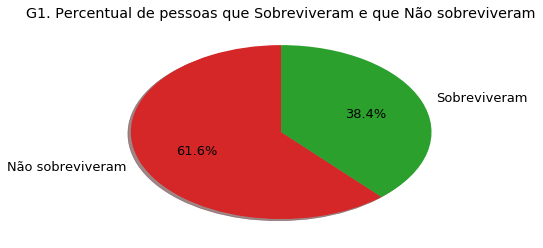

In [19]:
df['Sobreviveu'].value_counts().plot.pie(colors=('tab:red', 'tab:green'), 
                                       title='G1. Percentual de pessoas que Sobreviveram e que Não sobreviveram', 
                                       fontsize=13, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       labels=('Não sobreviveram','Sobreviveram'),
                                       figsize=(6,4)).set_ylabel('')

Quase um terço das pessoas do dataset não sobreviveram. 

### 2 - CLASSE

Vamos analisar agora as informações relacionadas â Classe em que a pessoa estava. Saber se houve ou não alguma influência sobre a pessoa ter sobrevivido ou não

##### Quantidade de pessoas por classe

In [20]:
df.pivot_table(index='Classe',  values='Nome', aggfunc='count')

,Nome
Classe,
1,216
2,184
3,491


Text(0,0.5,'Quantidade')

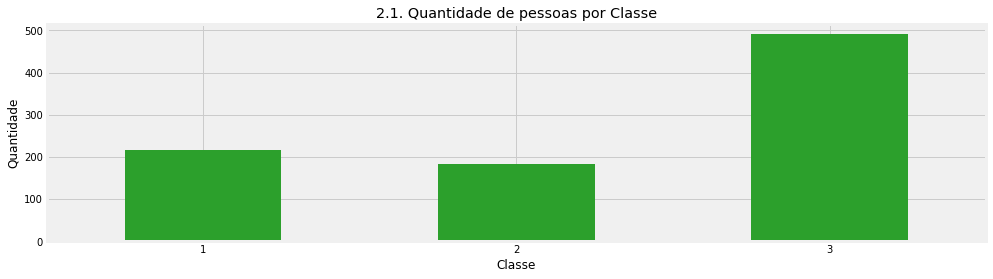

In [21]:
df.pivot_table(index='Classe',  values='Nome', aggfunc='count').plot(kind='bar', legend=None, figsize=(15,4),\
                                                                     title="2.1. Quantidade de pessoas por Classe", 
                                                                     color=vcolor2, rot=0).set_xlabel('Classe')
plt.ylabel('Quantidade')

In [22]:
df[df['Sobreviveu'] == 1].groupby('Classe').sum()['Sobreviveu'].plot(kind='bar',
                                                      title='2.2. Quantide de sobreviventes por Classe',
                                                      color=vcolor2, rot=0).set_xlabel('Classe')
plt.ylabel('Quantidade')

KeyError: 'Sobreviveu'

Obseve que apesar do número maior de pessoas ser da 3a classe (grafico 2.1) o número maior de sobreviventes foi da 1a classe.

In [ ]:
df_survived = df.groupby('Classe')[['Sobreviveu']].sum()

In [ ]:
df_survived.apply(lambda x: (x / x.sum(axis=0))*100)['Sobreviveu'].plot.pie(fontsize=13, 
                             title='2.3. Percentual de Sobreviventes por Classe (em relação ao total de sobreviventes)',
                             startangle=90, autopct='%1.0f%%', shadow=True, colors=vcolor2,
                             figsize=(6,4)).set_ylabel('')

In [ ]:
df_survived.apply(lambda x: (x / x.sum(axis=0))*100)['Sobreviveu']

<font color="gray">
A classe que teve o menor percentual de sobreviventes foi a 2a classe (25% do total de sobreviventes). 


In [ ]:
df[df['Não sobreviveu'] == 1].groupby('Classe').sum()['Não sobreviveu'].plot(kind='bar',
                                                      title='2.4. Quantide de Não sobreviventes por Classe',
                                                      color=vcolor2, rot=0, figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')

In [ ]:
df_nsurvived = df.groupby('Classe')[['Não sobreviveu']].sum()

In [ ]:
df_nsurvived.apply(lambda x: (x / x.sum(axis=0))*100)['Não sobreviveu'].plot.pie(fontsize=13, 
                             title='2.5. Percentual de Não sobreviventes por Classe (em relação ao total de Sobreviventes)',
                             startangle=90, autopct='%1.0f%%', shadow=True, colors=vcolor2, legend=True, 
                             figsize=(6,4), labels=('1','2','3')).legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')

De todas as pessoas que Não sobreviveram, 68% eram da 3a classe. Enquanto que na primeira e segunda foram 15% e 18% respectivamente.

#### Segue um gráfico com a proporção de de pessoas que Sobreviveram e que Não sobreviveram por Classe

In [ ]:
df_prop = df.pivot_table(index='Classe',  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)

In [ ]:
df_prop['Proporção de Sobreviventes'] = df_prop['Sobreviveu'] / df['PassengerId'].count()
df_prop['Proporção de Não Sobreviventes'] = df_prop['Não sobreviveu'] / df['PassengerId'].count()

In [ ]:
df_prop.drop('Sobreviveu', axis=1, inplace=True)
df_prop.drop('Não sobreviveu', axis=1, inplace=True)

In [ ]:
df_prop.round(2).plot(kind='bar', rot=0, color=('tab:green','tab:red'),
              title='2.6. Proporção de pessoas que Sobreviveram e Não sobreviveram por Classe',
              table=True)
plt.ylabel('Proporção')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) # set_position([left, bottom, width, height])

A proproção acima é em relação ao total de pessoas. Aqui podemos ver a grande diferença entre a primeira e a segunda classe em relação a terceira classe

In [ ]:
df_prop2 = df.pivot_table(index='Classe',  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)

In [ ]:
df_prop2['Percentual de Sobreviventes'] = df_prop2['Sobreviveu'] / (df_prop2['Sobreviveu'] + df_prop2['Não sobreviveu'])
df_prop2['Percentual de Não Sobreviventes'] = df_prop2['Não sobreviveu'] / (df_prop2['Sobreviveu'] + df_prop2['Não sobreviveu'])

In [ ]:
df_prop2

In [ ]:
df_prop2.drop('Sobreviveu', axis=1, inplace=True)
df_prop2.drop('Não sobreviveu', axis=1, inplace=True)

In [ ]:
df_prop2.applymap(lambda x: x * 100).round(0).plot(kind='bar', color=('tab:green', 'tab:red'), #'rbrgkymc', 
              title='2.7. Proporção de pessoas que Sobreviveram e que Não sobreviveram (em relação a própria Classe)',
              grid=True, table=True, rot=0, stacked=True).legend(bbox_to_anchor=(1.05, 1.0))
plt.ylabel('Percentagem')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) # set_position([left, bottom, width, height])

O gráfico acima mostra o percentual de Sobreviventes e de Não sobreviventes em relação a própria classe e não em relação ao total de passageiros.

- 1 - Do total de pessoas da primeira classe, aprox. 63% sobreviveram, e 37% não sobreviveram
- 2 - Do total de pessoas da 2a classe, aprox. 47% sobreviveream, e 52% não sobreviveram
- 3 - Do total de pessoas que estavam na 3a classe, aproximadamente 24% sobrevieram, e 76% não sobreviveram

### 3 - SEXO

Realizando exploração nos dados com relação ao Sexo

In [ ]:
df.groupby('Sexo').count()['PassengerId'].plot.pie(title='3.1. Percentual de passageiros por Sexo',
                                                  colors=vcolor, figsize=(6,4), labels=('Mulheres','Homens'),
                                                  startangle=90, autopct='%1.0f%%', shadow=True).set_ylabel('')

In [ ]:
#EDITADO
df.pivot_table(index='Sexo',  values=('Sobreviveu','Não sobreviveu'), aggfunc='count')[['Sobreviveu','Não sobreviveu']].plot(
    kind='bar', rot=0, label=('Feminino','Masculino'),
    color=('tab:green','tab:red'), stacked=True,
    title='3.2. Qtd. de Sobreviventes e de Não sobreviventes por Sexo').set_xlabel('Sexo')
plt.ylabel('Quantidade')

A maior parte das pessoas abordo do Titanic, eram homens (65%).

In [23]:
#df.pivot_table(index='Sexo',  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)[['Sobreviveu','Não sobreviveu']].plot(
#    kind='bar', rot=0, label=('Feminino','Masculino'),
#   color=('tab:green','tab:red'), stacked=True,
#    title='3.2. Qtd. de Sobreviventes e de Não sobreviventes por Sexo').set_xlabel('Sexo')
#plt.ylabel('Quantidade')

#ORIGINAL

Podemos observar a disparidade entre as informações das Mulheres e dos homens. Vejam a relaçao entre Sobreviente e Não sobrevientes.

In [24]:
df.pivot_table('PassengerId', ["Sexo"], 'Classe', aggfunc='count')

Classe,1,2,3
Sexo,,,
Homem,122,108,347
Mulher,94,76,144


Text(0.5,0,'Quantidade')

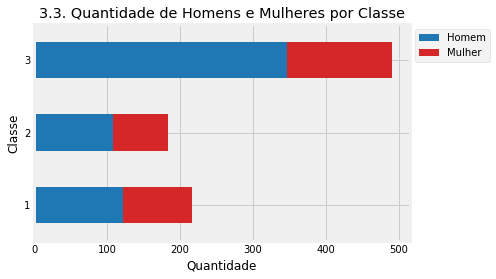

In [25]:
df.pivot_table('PassengerId', ['Classe'], 'Sexo', aggfunc='count').sort_index().plot(kind='barh', 
                                            color=('tab:blue','tab:red'), stacked=True, 
                                            title='3.3. Quantidade de Homens e Mulheres por Classe').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Quantidade')

No gráfico acima é possível identificar a distribuição de mulheres ou homens nas três classes. A classe com maior número de homens e mulheres é a terceira classe

In [26]:
df.groupby(['Sexo','Classe']).count()[['Sobreviveu','Não sobreviveu']]

Sobreviveu  Não sobreviveu
Sexo   Classe                            
Homem  1              122             122
       2              108             108
       3              347             347
Mulher 1               94              94
       2               76              76
       3              144             144

In [27]:
df[df['Sobreviveu'] == 1].pivot_table('PassengerId', ['Classe'], 'Sexo', aggfunc='count').plot(kind='barh',                       
                                                                      color=('tab:blue','tab:red'), 
                                                                      title='3.4. Quantidade de Sobrevientes Homens e Mulheres por Classe')\
                                                                      .legend(bbox_to_anchor=(1.1, 1.0))
plt.xlabel('Quantidade')

TypeError: Empty 'DataFrame': no numeric data to plot

A classe com maior diferença entre a sobrevivência entre homens e mulhesres foi a 2a classe.

In [28]:
df1 = df[df['Sobreviveu'] == 1].pivot_table('PassengerId', ['Sexo'], 'Classe', aggfunc='count')

In [29]:
df2 = df.pivot_table('PassengerId', ['Sexo'], 'Classe', aggfunc='count')

In [30]:
df2

Classe,1,2,3
Sexo,,,
Homem,122,108,347
Mulher,94,76,144


In [31]:
df1.rename(index={'1-Mulher': '1.2. Mulheres Sobreviventes'}, inplace=True)
df1.rename(index={'2-Homem': '2.2. Homens Sobreviventes'}, inplace=True)
df2.rename(index={'1-Mulher': '1.1.  Mulheres TOTAL'}, inplace=True)
df2.rename(index={'2-Homem': '2.1. Homens TOTAL'}, inplace=True)

In [32]:
df_res = pd.concat([df1, df2], axis=0)

In [33]:
df_res.sort_index(ascending=True)

Classe,1,2,3
Sexo,,,
Homem,122,108,347
Mulher,94,76,144


Text(0.5,0,'Quantidade')

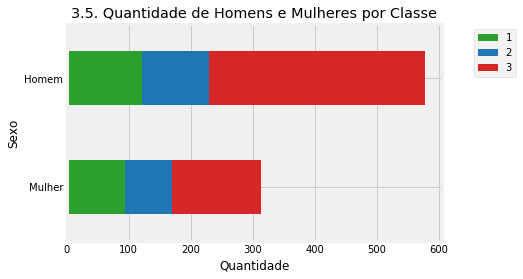

In [34]:
df_res.sort_index(ascending=False).plot(kind='barh', 
                                        color=('tab:green','tab:blue', 'tab:red'), stacked=True, 
                                        title='3.5. Quantidade de Homens e Mulheres por Classe').legend(bbox_to_anchor=(1.07, 1.0))
plt.xlabel('Quantidade')

Atavés deste gráfico podemos fazer uma série de comparações:

- <b>MULHERES (1.1 e 1.2)</b><br/>
Na primeira barra estamos exibindo o Total de mulheres (1.1) na segunda o total de mulheres que sobrevieu (1.2). Note que praticamente 100% das mulheres da primeira classe sobreviveram. Quase 100% das mulheres da 2a classe também sobreviveram. Em relação a terceira classe, o percentual foi bem menor.


- <b>HOMENS (2.1 e 2.2)</b><br/>
 A terceira barra é a quantidade total de homens, já na quarta barra são os homens que sobreviveram. Note que a quantidade e homens sobreviventes é foi muito baixa. Em relação ao total de sobreviventes, a segunda classe foi a que menos tiveram sobreviventes, seguido da terceira e depois a primeira classe.
 
 Podemos também comparar a quantidade deMulheres e Homens que sobreviveram. Linhas 2 (1.2) e 4 (2.2). Fica claro aqui que as mulheres tiveram muito mais chances de sobreviverem.

Vamos agora criar uma visualização das informações acima para facilitar a comparação (distância) entre as informações 

In [35]:
df_res2 = df_res.transpose()

([<matplotlib.axis.XTick at 0x1df9baac3c8>,
 <a list of 3 Text xticklabel objects>)

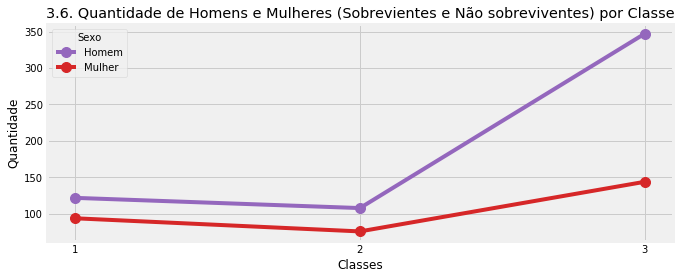

In [36]:
df_res2.sort_index(ascending=True).plot(title='3.6. Quantidade de Homens e Mulheres (Sobrevientes e Não sobreviventes) por Classe', 
                                        figsize=(10,4), marker='o', markersize=10, 
                                        color=('tab:purple','tab:red','tab:blue','tab:orange'))
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.xlim(0.9, 3.1)
plt.xticks([1,2,3])

O gráfico acima mostra de uma maneira simples a distância entre os sobreviventes e não sobrevientes. Com o foco no sexo feminino, podemos verificar a distância entre a linha azul (1.1. Mulheres TOTAL) e a linha roxa (1.2. Mulheres Sobreviventes). Compare a distância entre uma e outra de acordo com a classe (1, 2 e 3 - Eixo X). A quantidade de sobrevientes entre a 1a e 2a classe são praticamente iguais. Fica mais distante quando chegamos na 3a classe.

Agora façamos essa mesma análise para o sexo masculino. Note a distância entre a linha Laranja (2.1. Homens TOTAL), e a linha vermelha (2.2. Homens Sobreviventes). Note que há uma distâcia bastante grande, principalmente conforme vamos aumentando o número da classe.

- As mulheres da 1a e 2a classe tiveram maiores chances de sobreviverem em relação as mulheres da 3 classe? 

In [37]:
df.pivot_table(index=('Sexo','Classe'),  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)[['Sobreviveu','Não sobreviveu']]

Sobreviveu  \
Sexo   Classe                                                      
Homem  1       NãoSimNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoSimNãoN...   
       2       SimNãoSimNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoN...   
       3       NãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoN...   
Mulher 1       SimSimSimSimSimSimSimSimSimSimNãoSimSimSimSimS...   
       2       SimSimNãoSimSimSimSimSimSimSimSimSimSimSimNãoS...   
       3       SimSimSimNãoNãoSimSimNãoSimSimSimNãoSimNãoSimS...   

                                                  Não sobreviveu  
Sexo   Classe                                                     
Homem  1       SimNãoSimSimSimSimSimNãoSimSimSimSimSimNãoSimS...  
       2       NãoSimNãoSimSimSimNãoSimSimSimSimSimSimSimSimS...  
       3       SimSimSimSimSimSimSimSimSimNãoSimSimSimSimSimS...  
Mulher 1       NãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoN...  
       2       NãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimN...  
       3       NãoNãoNãoSimSimNãoNãoSimNãoNãoNãoSimNãoSimNãoN...

In [38]:
df.pivot_table(index=('Sexo','Classe'),  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)[['Sobreviveu','Não sobreviveu']].plot(kind='bar', 
color=('tab:green','tab:red'),
title='3.7. Quantidade por Sexo e Classe').set_xlabel('Sexo, Classe')
plt.ylabel('Quantidade')

TypeError: Empty 'DataFrame': no numeric data to plot

Quase 100% das muheres da 1a e 2a classe se salvaram, enquanto que as mulheres da terceira classe a proporção foi de meio a meio, ou seja, 50% se salvou e 50% não. Então podemos concluir que sim, as mulheres da 1a e segunda classe foram favorecidas em relação as da 3a classe.

Podemos notar algo interssante, a quantidade de SOBREVIVENTES é a mais alta na barra da esquerda (mulheres da primeira classe) e vem caindo. Sobe um pouco quando chegamos nos nos homens da terceira classe. E a quantidade de NÃO SOBREVIENTES é ao contrário, a quantidade menor identificada é justamente na primeira barra e vem subindo cada vez mais, e atinte o pico máximo com os homens da terceira classe. Forma-se uma espécie de X.

Proporção em relação à própria classe:

In [39]:
df.pivot_table(index=('Sexo','Classe'),  values=('Sobreviveu','Não sobreviveu'), aggfunc=np.sum)

Não sobreviveu  \
Sexo   Classe                                                      
Homem  1       SimNãoSimSimSimSimSimNãoSimSimSimSimSimNãoSimS...   
       2       NãoSimNãoSimSimSimNãoSimSimSimSimSimSimSimSimS...   
       3       SimSimSimSimSimSimSimSimSimNãoSimSimSimSimSimS...   
Mulher 1       NãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoN...   
       2       NãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoNãoSimN...   
       3       NãoNãoNãoSimSimNãoNãoSimNãoNãoNãoSimNãoSimNãoN...   

                                                      Sobreviveu  
Sexo   Classe                                                     
Homem  1       NãoSimNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoSimNãoN...  
       2       SimNãoSimNãoNãoNãoSimNãoNãoNãoNãoNãoNãoNãoNãoN...  
       3       NãoNãoNãoNãoNãoNãoNãoNãoNãoSimNãoNãoNãoNãoNãoN...  
Mulher 1       SimSimSimSimSimSimSimSimSimSimNãoSimSimSimSimS...  
       2       SimSimNãoSimSimSimSimSimSimSimSimSimSimSimNãoS...  
       3       SimSimSimNãoNãoSimSimNãoSimSimSimNãoSimNãoSimS...

In [42]:
df_woman = df[df['Sexo'] == '1-Mulher'].groupby('Classe').agg({'Sobreviveu': ['count'], 'Não sobreviveu': ['count']})
#df_woman = df[df['Sex'] == 'female'].groupby('Pclass')['Survived', 'Nsurvived'].sum()

In [43]:
df_woman['Percentual de sobreviventes'] = ((df_woman['Sobreviveu'] / (df_woman['Sobreviveu'] + df_woman['Não sobreviveu'])) * 100)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [44]:
df_woman['Percentual de Não sobreviventes'] = 100 - df_woman['Percentual de sobreviventes']

KeyError: 'Percentual de sobreviventes'

In [80]:
df_woman.drop('Sobreviveu', axis=1, inplace=True)
df_woman.drop('Não sobreviveu', axis=1, inplace=True)

In [81]:
df_woman

Classe


In [82]:
df_woman.round(1).plot(kind='bar',rot=0,
              title='3.8. Percentual de Mulheres Sobreviventes e Não sobreviventes (com referência à própria Classe)',
              stacked=True, table=True).legend(bbox_to_anchor=(1.3, 1.0))
plt.ylabel('Percentagem')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) # set_position([left, bottom, width, height])

TypeError: Empty 'DataFrame': no numeric data to plot

Note acima que aproximadamente 97% das mulheres da 1a classe sobrevieram, e da 2a classe 92% sobreviveram. enquanto que das mulheres da 3a classe somente 50% sobreviveram.

### 4 - IDADE

Como saber que pode ter sido um fator relevante?

Conforme já identificado anteriormente, existe uma parcela das pessoas que estavam com a idade sem preenchimento. Vamos verificar:

In [49]:
print('Passageiros SEM idade preenchida:',df['Idade'].isnull().sum())
print('Passageiros COM idade preenchida:',(~df['Idade'].isnull()).sum())

Passageiros SEM idade preenchida: 177
Passageiros COM idade preenchida: 714


Das 891 pessoas, 177 (aproximadamente 20%) estão com idade sem preenchimento. 

É possível utilizar técnicas inclusive com a utilização de Machine Learning para predizer quais valores poderíamos utilizar para preencher a idade dos registros que estão sem preenchimento. No entanto para esta análise, iremos utilizar a abordagem mais simples que é desconsiderar os registros nulos. 

Agora iremos viualizar a distribuição da idade:

<b>Histograma por Idade

Text(0,0.5,'Frequência')

<Figure size 432x288 with 0 Axes>

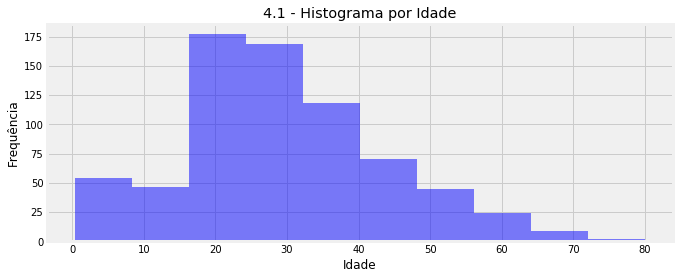

In [50]:
plt.figure();
df.hist(column='Idade', color=('blue'), alpha=0.5, bins=10, figsize=(10,4))
plt.title('4.1 - Histograma por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

A maioria dos passageiros tinham aproximadamente 18 e 32 anos. 

Em relação à idade, será que as crianças tiveram alguma preferência? 

<Figure size 432x288 with 0 Axes>

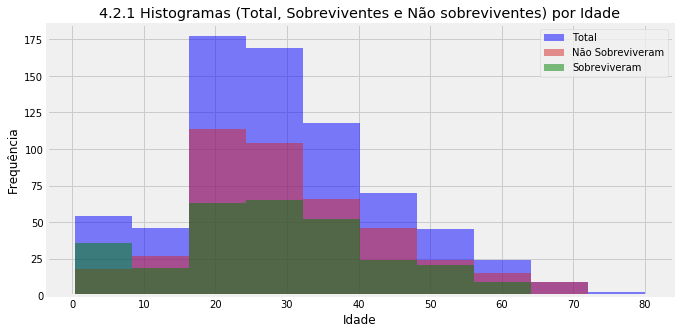

In [51]:
df_histage = pd.DataFrame({'Total': df['Idade'],
                           'Não Sobreviveram': df[df['Não sobreviveu'] == 1]['Idade'], 
                           'Sobreviveram': df[df['Sobreviveu'] == 1]['Idade']},                       
                    
                          columns=['Total','Não Sobreviveram', 'Sobreviveram'])

plt.figure();

df_histage.plot.hist(bins=10, alpha=0.5, figsize=(10,5), color=('blue','tab:red','green'), 
                     title='4.2.1 Histogramas (Total, Sobreviventes e Não sobreviventes) por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Analisando o gráfico acima, podemos ver que a faixa onde encontram-se as crianças (de 0 a 10) tem um alto indice de sobrevivencia.

Vamos desenvolver o gráfico abaixo onde a visualização das idades ficarão ainda mais evidêntes:

([<matplotlib.axis.XTick at 0x1c8bd045b00>,
 <a list of 9 Text xticklabel objects>)

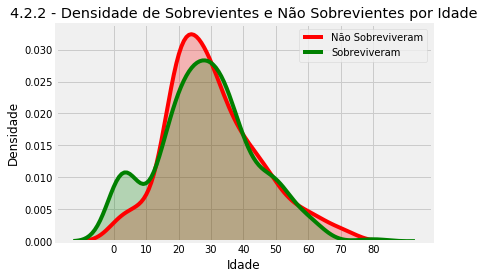

In [52]:
ax = sns.kdeplot(df_histage['Não Sobreviveram'], shade=True, color="r")
ax = sns.kdeplot(df_histage['Sobreviveram'], shade=True, color="g")
plt.title('4.2.2 - Densidade de Sobrevientes e Não Sobrevientes por Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.xticks((0, 10, 20, 30, 40, 50, 60, 70, 80))

Observe que em relação a quantiade de Sobreviventes e de Não sobreviventes, a faixa de idade entre 0 e aproximadamente 10 anos foi de todas a faixa que mais houveram sobrevientes.

Vamos analisar a média de sobrevivência das crianças e depois compararmos com a média  de sobreivência dos adultos.

Iremos considerar crianças com idade menor que 12 anos.

In [53]:
df_age = df.copy()

In [54]:
# Excluir registros sem idade preenchida
df_age.drop(df_age[df_age['Idade'].isnull() == True].index ,inplace=True)

In [55]:
df_age['Crianca_Adulto'] = 0

In [56]:
df_age.loc[df_age[df_age['Idade'] < 12].index, 'Crianca_Adulto'] = 'Crianças'

In [57]:
df_age.loc[df_age[df_age['Idade'] >= 12].index, 'Crianca_Adulto'] = 'Não crianças'

In [58]:
df_age.groupby('Crianca_Adulto')[['Sobreviveu']].mean()

,Sobreviveu
Crianca_Adulto,
Crianças,0.57
Não crianças,0.39


Text(0.5,0,'')

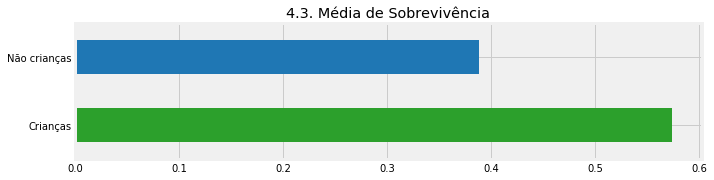

In [59]:
df_age.groupby('Crianca_Adulto')['Sobreviveu'].mean().plot.barh(title='4.3. Média de Sobrevivência', figsize=(10,2.5),
                                                                color=('tab:green','tab:blue')).set_ylabel('')
plt.xlabel('')

As crinaças tiveram uma média de sobrevivência de 0.57 enquanto as pessoas com idade igual ou acima de 12 anos tiveram uma média de sobrevivência de 0.38.

Vamos analisar as quantidades:

In [83]:
df_age_grp = df_age.groupby('Crianca_Adulto')['Sobreviveu','Não sobreviveu'].sum()

In [84]:
df_age_grp 

,Sobreviveu,Não sobreviveu
Crianca_Adulto,,
Crianças,39,29
Não crianças,251,395


Text(0.5,0,'Quantidade')

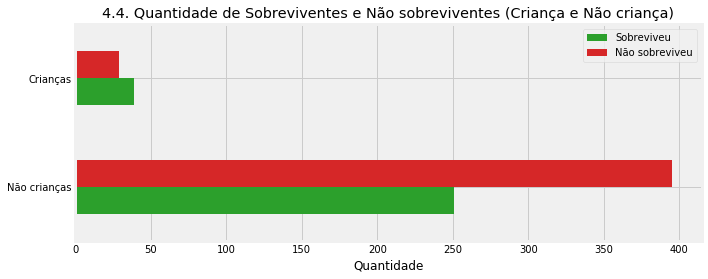

In [85]:
df_age.groupby(['Crianca_Adulto'])['Sobreviveu','Não sobreviveu'].sum().sort_values(by='Sobreviveu', ascending=False) \
      .plot(kind='barh', figsize=(10,4), title='4.4. Quantidade de Sobreviventes e Não sobreviventes (Criança e Não criança)',
            color=('tab:green','tab:red')).set_ylabel('')

plt.xlabel('Quantidade')

 Podemos ver acima que a quantidade de <b>Crianças</b> Soberviventes foram maiores que a quantidade de Não sobreviventes, enquanto que a quantidade de <b>Não crianças</b> sobreviventes, foi muito inferior à quantidade de Não Sobreviventes.

Em resumo, as "Crianças" sobreviveram mais do que morreram. Enquanto que as pessoas "Não crianças", morreram muito mais do que sobreviveram.

Quantidade de crianças por Classe

In [60]:
df_criancas = df[(df['Idade'] <= 11) & (df['Sobreviveu'] == 1)].groupby('Classe').count()[['Sobreviveu']]

In [61]:
df_criancas_tmp = df[(df['Idade'] <= 11) & (df['Sobreviveu'] == 0)].groupby('Classe').count()[['Sobreviveu']]

In [62]:
result = pd.concat([df_criancas, df_criancas_tmp], axis=1)

In [63]:
df_criancas_tmp2 = df[(df['Idade'] <= 11)].groupby('Classe').count()[['Sobreviveu']]

In [64]:
result = pd.concat([result, df_criancas_tmp2], axis=1)

In [65]:
result.columns.values[1] = 'Não sobreviveu'

In [66]:
result.columns.values[2] = 'Total'

In [67]:
result.fillna(0)

,Sobreviveu,Não sobreviveu,Total
Classe,,,
1,3,1.00,4
2,17,0.00,17
3,19,28.00,47


In [ ]:
result.fillna(0).plot(kind='bar', rot=0, figsize=(8,4), 
                    color=('tab:green','tab:red','tab:blue'),
                     title='4.5. Quantidade de Crianças que Sobrevieram e que Não Sobreviveram por Classe')
plt.ylabel('Quantidade')

Novamente podemos observar que as primeiras classes tiveram um alto número de sobreviventes. Na primeira classe morreu somente uma e na segunda classe não morreu nenhuma criança, enquanto da terceira classe, das 47 crianças somente 19 sobrevieram.

Vamos criar uma visualização para identificar o percentual de Crianças sobreviventes e de Não sobrevivêntes por classe

In [69]:
result_perc = result.copy()
result_perc['% Não sobreviveu'] = (result_perc['Não sobreviveu'] / result_perc['Total']) * 100
result_perc['% Sobreviveu'] = (result_perc['Sobreviveu'] / result_perc['Total']) * 100

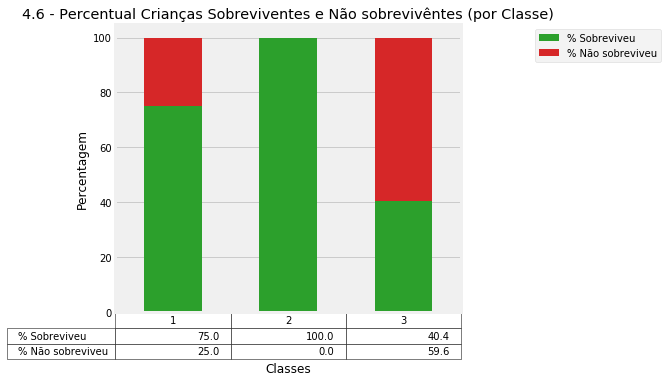

In [70]:
result_perc[['% Sobreviveu','% Não sobreviveu']].fillna(0).round(1).plot(kind='bar', title='4.6 - Percentual Crianças Sobreviventes e Não sobrevivêntes (por Classe)', 
                                                           rot=0, stacked=True, table=True,
                                                           color=('tab:green', 'tab:red')).legend(bbox_to_anchor=(1.2, 1.0))
plt.ylabel('Percentagem')
plt.xlabel('Classes', labelpad=50)
plt.xticks([])
plt.axes().set_position([0.15, 0.30, 0.80, 1.0]) # set_position([left, bottom, width, height])

O gráfico acima mostra a diferença que houve entre o percentua de crianças que sobreviveram e que não sobrevieram entre a primeira e segunda classe e a terceira classe.

60% das crianças da terceira classe morreram. Enquanto que na primeira classe morreram somente 25% e na segunda classe, das 17 criaças a bordo, nenhuma morreu.

### CONCLUSÃO:

Nossa análise exploratória teve como objetivo identificar atributos de alguns conjunto de pessoas para saber se tiveram maior chance de sobrevivência que outras. 

Sabe-se que o navio possuia um número de botes muito inferior ao número necessário para salvar a quantidade de pessoas abordo. Mesmo assim, era um número acima do exigido pelas legislações marítimas na época. Sendo assim, houve alguma priorização para a utilização dos botes?

Identificamos que fatores como a Classe, Sexo e Idade realmente influenciaram para o aumento ou diminuição das chances de sobrevivência.

As mulheres foram as que tiveram maiores chances de sobrevivência. Principalmente as da primeira e segunda classe. Os gráficos 3.5, 3.6 e 3.7 mostram uma visão bem clara da diferença. Em resumo as maiores chances de sobrevivência foram para as mulheres da primeira e segunda classe. E as menores chances de sobrevivência foram para os homens da terceira classe.<br/>
Realizando pesquisas foi encontrado um relato que o segundo oficial Lightoller se dirigiu ao capitão e sugeriu que a evacuação fosse iniciada com as mulheres e crianças. O capitão Smith concordou. Isso com certeza fez com que os indices de sobrevivência aumentassem e bastante, tanto para mulheres quanto para crianças.<br/>
Obs.: A preferência do embarque para mulheres e crianças ocorrida no Titanic é considerada uma exceção, ou seja, geralmente isso não ocorre em outros naufrágios.
Muitos homens, em sua maioria da primeira classe, se recusaram a entrar nos botes. Tiveram que ser persuadidos.

Em relação às crianças (menores que 12 anos - utilizado como referência o estatudo da criança e do adolescente), pudemos identificar que tiveram uma média de sobrevivência acima dos demais (0,57 contra 0,38) - Gráficos 4.2.1, 4.2.2, 4.3 e 4.4. 

Foi identificado também que a maioria das pessoas que não sobrevieram foram da terceira classe (Gráficos G2.4, 2.5, 2.6 , 3.6 e 3.7). Conforme podemos constatar no gráfico 4.5 e 4.6 das crianças da terceira classe 60% morreram, enquanto que na primeira classe foi de 15% e para a segunda classe nenhuma criança morreu. Podemos ver essa mesma  tendência de maior taxa de sobrevivência das mulheres entre primeira / segunda classe e a terceira classe através do gráfico 3.7.

Em pesquisas realizadas também foi informado que muito poucas pessoas da terceira classe tinham conseguido chegar ao convés superior, com a maioria se perdendo nos labirintos de corredores ou ficando presos atrás de grades que segregavam as acomodações da terceira classe daquelas da primeira e segunda. Aparentemente em pelo menos em alguns lugares, a tripulação do Titanic ativamente impediu que os passageiros da terceira classe escapassem, com barreiras trancadas e vigiadas por tripulantes a fim de impedir que as pessoas corressem para os botes.
<br/>
<br/>
Este estudo pode ser continuado com a análise de outras variáveis, explorar e encontrar novos insights utilizando as informações desta base para gerar novas variáveis, como por exmemplo saber se é possível identificar os tripulantes. Será que quem não tem informação de Tarifa (Fare) preenchida pode ser um tripulante? Seria possível indificá-los e encontrar sua taxa de sobrevivência e compará-la e ver se essa taxa foi maior que a taxa de sobrevivência dos passageiros?
A própria idade como já comentado poderia ser explorada através de técnicas preditivas para identificarmos melhor como esta informação impactou na taxa de sobrevivência.
<br/>
<br/>
<i>IMPORTANTE: É importante ressaltar que as conclusões identificadas não são definitivas, pois não estamos usando técnicas estatisticas para a realização deste estudo.
<br/>
<br/>